<a href="https://colab.research.google.com/github/nikhilkoditala/CSC-8980-NLP/blob/main/NLP_HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Name: Nikhil Koditala

## Panther ID: 002571023

In [5]:
from google.colab import drive
from sklearn.model_selection import train_test_split
import pandas as pd

In [6]:
# sklearn models
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import sklearn.metrics

# vectorization methods
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!unzip /content/drive/MyDrive/trainingandtestdata.zip

Archive:  /content/drive/MyDrive/trainingandtestdata.zip
  inflating: testdata.manual.2009.06.14.csv  
  inflating: training.1600000.processed.noemoticon.csv  


In [9]:
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding='latin-1',names=['polarity','id','date','query','user','text'])

In [10]:
df.head()

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


 1. Take the positive and the negative tweets only. Use Sklearn to split the dataset in 80% training, 20% testing splits. Provide a nicely formatted summary of these splits, containing their size) (15 points)

In [11]:
# considering only positive and negative reviews
df = df.loc[(df['polarity'].isin([0,4]))]

In [12]:
X = df['text'].tolist()
y = df['polarity'].tolist()

In [13]:
y = [x if x==0 else 1 for x in y]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=2361)

In [15]:
print('Rows present in training dataset:')
X_train[:10]

Rows present in training dataset:


['@scarlettstvitus It helps me to put a bag of ice on top of my head to relieve bad headaches! It helps!   I hope you feel better soon, Scar',
 "@tommcfly it's actually law of humans' life... I suppose we should reconcile ourselves to it ",
 '@ryanseacrest Son of a crap!  I thought Adam Lambert on Twitter was real.   I still have mad love for you though, Ryan!',
 "Alright folks I think I'm going to go try and sleep now I have to be up at 5:45 and it's already a little after midnight I can't sleep ",
 "loves that there's so much Federer love going around! YAY, ROGER!!!!!    http://plurk.com/p/z4jqu",
 "'n Sync - Bye, Bye, Bye - NSYNC http://bit.ly/A3w6L  @laurajane29 promised me she'd teach me the dance - she didn't ",
 'Really bad cold  I get a day off school thou ',
 '@pnbsport man, hurt my shoulder in a bad way 2.5 weeks back at gym, have not ridden since! Hoping to try again next week ',
 '@pollygallimore F1 race on Fox (wah!) at 3 PM. Tape-delayed. ',
 '@feblub I really need to get

In [16]:
print('Rows present in test dataset:')
y_train[:10]

Rows present in test dataset:


[1, 1, 0, 0, 1, 0, 0, 0, 0, 0]

In [17]:
print('Size of training dataset: ', len(X_train))
print('Size of testing dataset: ', len(X_test))

Size of training dataset:  1280000
Size of testing dataset:  320000


2 Use the code from the previous classes to build the following models (15 points): 

a) SVM using TF-IDF.

b) NaiveBayesusingTF-IDF.

c) Random Forest using TF-IDF.

In [18]:
def model_train(algorithm_name, vectorization_method, training_set):
  models = [MultinomialNB(),RandomForestClassifier(n_jobs=-1, max_depth=50),SVC(kernel='linear',max_iter=10000)]
  vectorization_methods = [TfidfVectorizer()]
  model = None
  vector_method = None
  modelFound = 0
  vectorFound = 0

  for m in models: 
    if(m.__class__.__name__ == algorithm_name):
      model = m
      modelFound = 1
      break
  
  if(not modelFound):
    return 'Model not found, please recheck algorithm name to match sklearn class name'
  
  for v in vectorization_methods: 
    if(v.__class__.__name__ == vectorization_method):
      vector_method = v
      vectorFound = 1
      break
  
  if(not vectorFound):
    return 'Vectorization method not found, please recheck algorithm name to match sklearn class name'
  
  model = make_pipeline(vector_method, model)
  model.fit(training_set['data'], training_set['labels'])

  return model

In [19]:
training_set = {}
training_set['data'] = X_train
training_set['labels'] = y_train

In [20]:
NB_TfidfVectorizer = model_train('MultinomialNB','TfidfVectorizer',training_set)

In [21]:
y_pred = NB_TfidfVectorizer.predict(X_test)

In [22]:
nb_accuracy = sklearn.metrics.accuracy_score(y_pred,y_test)
nb_recall = sklearn.metrics.recall_score(y_pred,y_test)
nb_percision =  sklearn.metrics.precision_score(y_pred,y_test)
nb_f1score =  sklearn.metrics.f1_score(y_pred,y_test)

In [ ]:
RandomForest_TfidfVectorizer = model_train('RandomForestClassifier','TfidfVectorizer',training_set)

In [ ]:
y_pred = RandomForest_TfidfVectorizer.predict(X_test)

In [ ]:
rf_accuracy = sklearn.metrics.accuracy_score(y_pred,y_test)
rf_recall = sklearn.metrics.recall_score(y_pred,y_test)
rf_percision =  sklearn.metrics.precision_score(y_pred,y_test)
rf_f1score =  sklearn.metrics.f1_score(y_pred,y_test)

In [34]:
print(rf_accuracy, rf_recall, rf_percision, rf_f1score,)

0.7970375 0.8090021325288672 0.7776840289496382 0.7930340014658551


In [21]:
SVC_TfidfVectorizer = model_train('SVC','TfidfVectorizer',training_set)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [23]:
y_pred = SVC_TfidfVectorizer.predict(X_test)

In [26]:
svc_accuracy = sklearn.metrics.accuracy_score(y_pred,y_test)
svc_recall = sklearn.metrics.recall_score(y_pred,y_test)
svc_percision = sklearn.metrics.precision_score(y_pred,y_test)
svc_f1score = sklearn.metrics.f1_score(y_pred,y_test)


In [25]:
print(svc_accuracy, svc_recall, svc_percision, svc_f1score)

0.589728125 0.6096670460360987 0.4988500143748203 0.5487194117990796


 3. Use the code from the LSTM class to build a classifier for negative and positive sentiment tweets. Train the model with the training data split. Once the model is built, test it with the testing data split. Display the classifier report for this evaluation. Answer the following question: What can you say about the performance of this model? (40 points)

In [10]:
!pip install numpy==1.16.2

# All the imports!
import tensorflow as tf 
import numpy as np
from tensorflow.keras.preprocessing import sequence
from numpy import array

# Supress deprecation warnings
import logging
logging.getLogger('tensorflow').disabled = True

# Map for readable classnames
class_names = [0,1]

In [74]:
# encoding
word_index = {}

total_data = X_train + X_test

i = 4
for row in total_data:
  for word in row.split(' '):
    if(word not in word_index):
      word_index[word] = i
      i += 1

word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNKNOWN>"] = 2
word_index["<UNUSED>"] = 3


In [75]:
vocab_size = len(word_index)

In [76]:
vocab_size

1350548

In [77]:
def encode_review(text):
  lst = []

  for i in text.split(' '):
    lst.append(word_index[i])
  
  return lst

In [78]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [79]:
encoded_x_train = []

for r in X_train:
  encoded_x_train.append(encode_review(r))

In [80]:
encoded_x_test = []

for r in X_test:
  encoded_x_test.append(encode_review(r))

In [81]:
X_train = encoded_x_train
X_test = encoded_x_test

In [83]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [84]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [85]:
# The length of reviews
review_length = 300

# Padding / truncated our reviews
X_train = sequence.pad_sequences(X_train, maxlen = review_length)
X_test = sequence.pad_sequences(X_test, maxlen = review_length)

# Check the size of our datasets. Review data for both test and training should 
# contain 25000 reviews of 500 integers. Class data should contain 25000 values, 
# one for each review. Class values are 0 or 1, indicating a negative 
# or positive review.
print("Shape Training Review Data: " + str(X_train.shape))
print("Shape Training Class Data: " + str(y_train.shape))
print("Shape Test Review Data: " + str(X_test.shape))
print("Shape Test Class Data: " + str(y_test.shape))

Shape Training Review Data: (1280000, 300)
Shape Training Class Data: (1280000,)
Shape Test Review Data: (320000, 300)
Shape Test Class Data: (320000,)


In [86]:
# We begin by defining the a empty stack. We'll use this for building our 
# network, later by layer.
model = tf.keras.models.Sequential()

# The Embedding Layer provides a spatial mapping (or Word Embedding) of all the 
# individual words in our training set. Words close to one another share context 
# and or meaning. This spatial mapping is learning during the training process.
model.add(
    tf.keras.layers.Embedding(
        input_dim = vocab_size, # The size of our vocabulary 
        output_dim = 32, # Dimensions to which each words shall be mapped
        input_length = review_length # Length of input sequences
    )
)

# Dropout layers fight overfitting and forces the model to learn multiple 
# representations of the same data by randomly disabling neurons in the 
# learning phase.
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

# We are using a fast version of LSTM whih is optimised for GPUs. This layer 
# looks at the sequence of words in the review, along with their word embeddings
# and uses both of these to determine to sentiment of a given review.
model.add(
    tf.keras.layers.LSTM(
        units=32 # 32 LSTM units in this layer
    )
)

# Add a second dropout layer with the same aim as the first.
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

# All LSTM units are connected to a single node in the dense layer. A sigmoid 
# activation function determines the output from this node - a value 
# between 0 and 1. Closer to 0 indicates a negative review. Closer to 1 
# indicates a positive review.
model.add(
    tf.keras.layers.Dense(
        units=1, # Single unit
        activation='sigmoid' # Sigmoid activation function (output from 0 to 1)
    )
)

# Compile the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimiser function
    metrics=['accuracy']) # reporting metric

# Display a summary of the models structure
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 32)           43217536  
_________________________________________________________________
dropout_4 (Dropout)          (None, 300, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 43,225,889
Trainable params: 43,225,889
Non-trainable params: 0
_________________________________________________________________


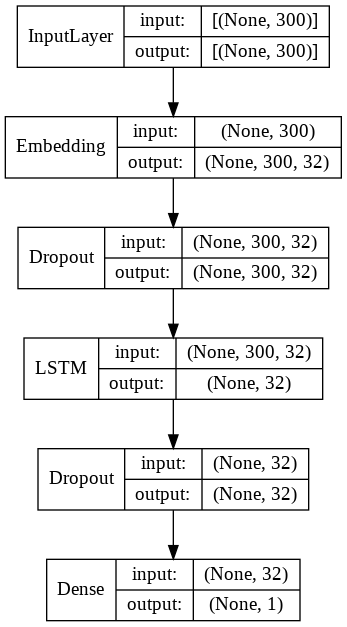

In [87]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)


In [88]:
# Train the LSTM on the training data
history = model.fit(

    # Training data : features (review) and classes (positive or negative)
    X_train, y_train,
                    
    # Number of samples to work through before updating the 
    # internal model parameters via back propagation. The 
    # higher the batch, the more memory you need.
    batch_size=256, 

    # An epoch is an iteration over the entire training data.
    epochs=3, 
    
    # The model will set apart his fraction of the training 
    # data, will not train on it, and will evaluate the loss
    # and any model metrics on this data at the end of 
    # each epoch.
    validation_split=0.2,
    
    verbose=1
)

Epoch 1/3
4000/4000 [==============================] - 1560s 390ms/step - loss: 0.4789 - accuracy: 0.7662 - val_loss: 0.3837 - val_accuracy: 0.8273
Epoch 2/3
4000/4000 [==============================] - 1556s 389ms/step - loss: 0.2932 - accuracy: 0.8773 - val_loss: 0.4014 - val_accuracy: 0.8226
Epoch 3/3
4000/4000 [==============================] - 1555s 389ms/step - loss: 0.1880 - accuracy: 0.9269 - val_loss: 0.4551 - val_accuracy: 0.8132


In [89]:
# Get Model Predictions for test data
from sklearn.metrics import classification_report
predicted_classes = model.predict_classes(X_test)
classification_report = classification_report(y_test, predicted_classes)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [90]:
print(classification_report)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82    159998
           1       0.82      0.80      0.81    160002

    accuracy                           0.81    320000
   macro avg       0.81      0.81      0.81    320000
weighted avg       0.81      0.81      0.81    320000



In [26]:
lstm_percision = 0.81
lstm_recall = 0.82
lstm_f1score = 0.82

### What can you say about the performance of this model?

LSTM is able to handle the classification task better than the ML models such as Naive Bayes, SVM or Random Forest. It is able to memorize long term dependencies on the tweets and is able to classify the positive and negative sentiment better. The training time of LSTM is also less than ML models. 

Overall, LSTM is performing better than other ML models.

4. Compare all models together in terms of Precision, Recall and F1 score. Put all of these numbers in a nicely formatted dataframe. Answer the following questions: Which model performs the best? Why do you think this is? What do you think you can do to improve performance? (30 points)

In [30]:
comp = {'Parameter': ['Percision', 'Recall', 'F1 Score'],
        'SVM': [svc_percision, svc_recall, svc_f1score], 
        'Naive Bayes': [nb_percision, nb_recall, nb_f1score], 
        'Random Forest': [rf_percision, rf_recall, rf_f1score], 
        'LSTM': [lstm_percision, lstm_recall, lstm_f1score]}
df = pd.DataFrame(data=comp)

print(df)

   Parameter       SVM  Naive Bayes  Random Forest  LSTM
0  Percision  0.498850     0.728078       0.777684  0.81
1     Recall  0.609667     0.800344       0.809002  0.82
2   F1 Score  0.548719     0.762503       0.793034  0.82


#### Which model performs the best? 

Among SVM, Naive Bayes, Random Forest and LSTM, LSTM is giving better performance in terms on Percision, Recall and F1 Score. 


#### Why do you think this is? What do you think you can do to improve performance? 

LSTM consists of memory gate and forget gate which allows nodes to forget and memorize information. This allows the neural network to understand long term dependencies better and it is able to understand the sentiments of tweets.


5. Add to the comparison of #4 a the manually calculated precision, recall and F1 score using VADER and their suggested defaults to categorize the test split tweets in positive or negative. Answer the following questions: Is this approach as good as the previous ones? Why do you think this is? (30 points)

In [12]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 17.1MB/s 


In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import sklearn.metrics

In [19]:
analyzer = SentimentIntensityAnalyzer()

In [33]:
y_pred = []
for tweet in X_test:
  vs = analyzer.polarity_scores(tweet)
  if(vs['compound'] >= 0.05):
    y_pred.append(1)
  else:
    y_pred.append(0)

In [34]:
vs_accuracy = sklearn.metrics.accuracy_score(y_pred,y_test)
vs_recall = sklearn.metrics.recall_score(y_pred,y_test)
vs_percision =  sklearn.metrics.precision_score(y_pred,y_test)
vs_f1score =  sklearn.metrics.f1_score(y_pred,y_test)

In [37]:
print('Accuracy: ',vs_accuracy)
print('Recall: ', vs_recall)
print('Percision: ', vs_percision)
print('F1 Score: ', vs_f1score)

Accuracy:  0.654334375
Recall:  0.6644775841053957
Percision:  0.6235172060349246
F1 Score:  0.643346090971526


#### Is this approach as good as the previous ones? Why do you think this is? 

When compared to LSTM, vader isn't producing good results. Even though, Vader is a rule-based model built for social media texts, LSTM is able to understand the text better and is able to produce better results. 

LSTMs are also very effective on sequential data such as texts, which made them produce better results.

# Bonus

1. Use 90% training data, 10% testing

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=2361)

In [22]:
encoded_x_train = []

for r in X_train:
  encoded_x_train.append(encode_review(r))

In [23]:
encoded_x_test = []

for r in X_test:
  encoded_x_test.append(encode_review(r))

In [24]:
X_train = encoded_x_train
X_test = encoded_x_test

In [25]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [26]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [27]:
# The length of reviews
review_length = 300

# Padding / truncated our reviews
X_train = sequence.pad_sequences(X_train, maxlen = review_length)
X_test = sequence.pad_sequences(X_test, maxlen = review_length)

# Check the size of our datasets. Review data for both test and training should 
# contain 25000 reviews of 500 integers. Class data should contain 25000 values, 
# one for each review. Class values are 0 or 1, indicating a negative 
# or positive review.
print("Shape Training Review Data: " + str(X_train.shape))
print("Shape Training Class Data: " + str(y_train.shape))
print("Shape Test Review Data: " + str(X_test.shape))
print("Shape Test Class Data: " + str(y_test.shape))

Shape Training Review Data: (1440000, 300)
Shape Training Class Data: (1440000,)
Shape Test Review Data: (160000, 300)
Shape Test Class Data: (160000,)


In [28]:
# We begin by defining the a empty stack. We'll use this for building our 
# network, later by layer.
model = tf.keras.models.Sequential()

# The Embedding Layer provides a spatial mapping (or Word Embedding) of all the 
# individual words in our training set. Words close to one another share context 
# and or meaning. This spatial mapping is learning during the training process.
model.add(
    tf.keras.layers.Embedding(
        input_dim = vocab_size, # The size of our vocabulary 
        output_dim = 32, # Dimensions to which each words shall be mapped
        input_length = review_length # Length of input sequences
    )
)

# Dropout layers fight overfitting and forces the model to learn multiple 
# representations of the same data by randomly disabling neurons in the 
# learning phase.
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

# We are using a fast version of LSTM whih is optimised for GPUs. This layer 
# looks at the sequence of words in the review, along with their word embeddings
# and uses both of these to determine to sentiment of a given review.
model.add(
    tf.keras.layers.LSTM(
        units=32 # 32 LSTM units in this layer
    )
)

# Add a second dropout layer with the same aim as the first.
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

# All LSTM units are connected to a single node in the dense layer. A sigmoid 
# activation function determines the output from this node - a value 
# between 0 and 1. Closer to 0 indicates a negative review. Closer to 1 
# indicates a positive review.
model.add(
    tf.keras.layers.Dense(
        units=1, # Single unit
        activation='sigmoid' # Sigmoid activation function (output from 0 to 1)
    )
)

# Compile the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimiser function
    metrics=['accuracy']) # reporting metric

# Display a summary of the models structure
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 32)           43217536  
_________________________________________________________________
dropout (Dropout)            (None, 300, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 43,225,889
Trainable params: 43,225,889
Non-trainable params: 0
_________________________________________________________________


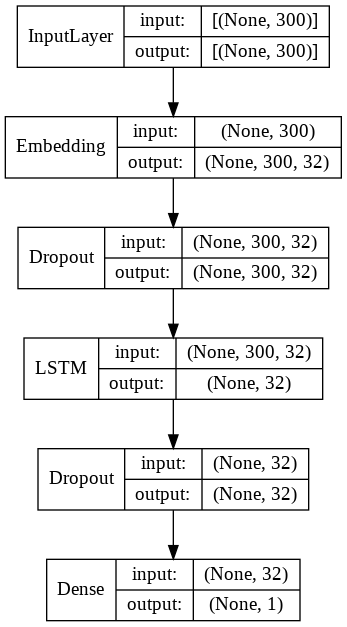

In [29]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)


In [30]:
# Train the LSTM on the training data
history = model.fit(

    # Training data : features (review) and classes (positive or negative)
    X_train, y_train,
                    
    # Number of samples to work through before updating the 
    # internal model parameters via back propagation. The 
    # higher the batch, the more memory you need.
    batch_size=256, 

    # An epoch is an iteration over the entire training data.
    epochs=3, 
    
    # The model will set apart his fraction of the training 
    # data, will not train on it, and will evaluate the loss
    # and any model metrics on this data at the end of 
    # each epoch.
    validation_split=0.2,
    
    verbose=1
)

Epoch 1/3
4500/4500 [==============================] - 1790s 391ms/step - loss: 0.4796 - accuracy: 0.7664 - val_loss: 0.3828 - val_accuracy: 0.8284
Epoch 2/3
4500/4500 [==============================] - 1755s 390ms/step - loss: 0.2982 - accuracy: 0.8754 - val_loss: 0.4002 - val_accuracy: 0.8247
Epoch 3/3
4500/4500 [==============================] - 1758s 391ms/step - loss: 0.1924 - accuracy: 0.9247 - val_loss: 0.4352 - val_accuracy: 0.8149


In [ ]:
predicted_classes = model.predict_classes(X_test)

In [32]:
from sklearn.metrics import classification_report
classification_report_10 = classification_report(y_test, predicted_classes)

In [33]:
print(classification_report_10)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82     80144
           1       0.82      0.80      0.81     79856

    accuracy                           0.82    160000
   macro avg       0.82      0.82      0.82    160000
weighted avg       0.82      0.82      0.82    160000



Remove stopwords from the tweets.

In [35]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_word = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [53]:
# remove stopwords
cleaned_X = []

for tweet in X:
  temp = ''
  for word in tweet.split(' '):
    if(word not in stop_word):
      temp += word + ' '
  cleaned_X.append(temp[:-1])

In [57]:
X = cleaned_X

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=2361)

In [59]:
encoded_x_train = []

for r in X_train:
  encoded_x_train.append(encode_review(r))

In [60]:
encoded_x_test = []

for r in X_test:
  encoded_x_test.append(encode_review(r))

In [61]:
X_train = encoded_x_train
X_test = encoded_x_test

In [62]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [63]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [64]:
# The length of reviews
review_length = 300

# Padding / truncated our reviews
X_train = sequence.pad_sequences(X_train, maxlen = review_length)
X_test = sequence.pad_sequences(X_test, maxlen = review_length)

# Check the size of our datasets. Review data for both test and training should 
# contain 25000 reviews of 500 integers. Class data should contain 25000 values, 
# one for each review. Class values are 0 or 1, indicating a negative 
# or positive review.
print("Shape Training Review Data: " + str(X_train.shape))
print("Shape Training Class Data: " + str(y_train.shape))
print("Shape Test Review Data: " + str(X_test.shape))
print("Shape Test Class Data: " + str(y_test.shape))

Shape Training Review Data: (1440000, 300)
Shape Training Class Data: (1440000,)
Shape Test Review Data: (160000, 300)
Shape Test Class Data: (160000,)


In [65]:
# We begin by defining the a empty stack. We'll use this for building our 
# network, later by layer.
model = tf.keras.models.Sequential()

# The Embedding Layer provides a spatial mapping (or Word Embedding) of all the 
# individual words in our training set. Words close to one another share context 
# and or meaning. This spatial mapping is learning during the training process.
model.add(
    tf.keras.layers.Embedding(
        input_dim = vocab_size, # The size of our vocabulary 
        output_dim = 32, # Dimensions to which each words shall be mapped
        input_length = review_length # Length of input sequences
    )
)

# Dropout layers fight overfitting and forces the model to learn multiple 
# representations of the same data by randomly disabling neurons in the 
# learning phase.
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

# We are using a fast version of LSTM whih is optimised for GPUs. This layer 
# looks at the sequence of words in the review, along with their word embeddings
# and uses both of these to determine to sentiment of a given review.
model.add(
    tf.keras.layers.LSTM(
        units=32 # 32 LSTM units in this layer
    )
)

# Add a second dropout layer with the same aim as the first.
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

# All LSTM units are connected to a single node in the dense layer. A sigmoid 
# activation function determines the output from this node - a value 
# between 0 and 1. Closer to 0 indicates a negative review. Closer to 1 
# indicates a positive review.
model.add(
    tf.keras.layers.Dense(
        units=1, # Single unit
        activation='sigmoid' # Sigmoid activation function (output from 0 to 1)
    )
)

# Compile the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimiser function
    metrics=['accuracy']) # reporting metric

# Display a summary of the models structure
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 32)           43217536  
_________________________________________________________________
dropout_2 (Dropout)          (None, 300, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 43,225,889
Trainable params: 43,225,889
Non-trainable params: 0
_________________________________________________________________


In [66]:
# Train the LSTM on the training data
history = model.fit(

    # Training data : features (review) and classes (positive or negative)
    X_train, y_train,
                    
    # Number of samples to work through before updating the 
    # internal model parameters via back propagation. The 
    # higher the batch, the more memory you need.
    batch_size=256, 

    # An epoch is an iteration over the entire training data.
    epochs=3, 
    
    # The model will set apart his fraction of the training 
    # data, will not train on it, and will evaluate the loss
    # and any model metrics on this data at the end of 
    # each epoch.
    validation_split=0.2,
    
    verbose=1
)

Epoch 1/3
4500/4500 [==============================] - 1762s 391ms/step - loss: 0.4966 - accuracy: 0.7538 - val_loss: 0.4185 - val_accuracy: 0.8053
Epoch 2/3
4500/4500 [==============================] - 1758s 391ms/step - loss: 0.3213 - accuracy: 0.8637 - val_loss: 0.4432 - val_accuracy: 0.7980
Epoch 3/3
4500/4500 [==============================] - 1772s 394ms/step - loss: 0.2169 - accuracy: 0.9133 - val_loss: 0.4960 - val_accuracy: 0.7877


In [67]:
predicted_classes = model.predict_classes(X_test)
classification_report_no_stop_words = classification_report(y_test, predicted_classes)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [68]:
print(classification_report_no_stop_words)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79     80144
           1       0.79      0.78      0.79     79856

    accuracy                           0.79    160000
   macro avg       0.79      0.79      0.79    160000
weighted avg       0.79      0.79      0.79    160000



Remove all user mentions for the tweets

In [92]:
X = df['text'].tolist()
y = df['polarity'].tolist()

y = [x if x==0 else 1 for x in y]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=2361)

In [95]:
# remove tweet handles
cleaned_X = []

for tweet in X:
  temp = ''
  for word in tweet.split(' '):
    if(word and word[0] != '@'):
      temp += word + ' '
  cleaned_X.append(temp[:-1])

In [96]:
X = cleaned_X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=2361)

encoded_x_train = []

for r in X_train:
  encoded_x_train.append(encode_review(r))

encoded_x_test = []

for r in X_test:
  encoded_x_test.append(encode_review(r))

X_train = encoded_x_train
X_test = encoded_x_test

X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [97]:
# The length of reviews
review_length = 300

# Padding / truncated our reviews
X_train = sequence.pad_sequences(X_train, maxlen = review_length)
X_test = sequence.pad_sequences(X_test, maxlen = review_length)

# Check the size of our datasets. Review data for both test and training should 
# contain 25000 reviews of 500 integers. Class data should contain 25000 values, 
# one for each review. Class values are 0 or 1, indicating a negative 
# or positive review.
print("Shape Training Review Data: " + str(X_train.shape))
print("Shape Training Class Data: " + str(y_train.shape))
print("Shape Test Review Data: " + str(X_test.shape))
print("Shape Test Class Data: " + str(y_test.shape))

Shape Training Review Data: (1440000, 300)
Shape Training Class Data: (1440000,)
Shape Test Review Data: (160000, 300)
Shape Test Class Data: (160000,)


In [98]:
# We begin by defining the a empty stack. We'll use this for building our 
# network, later by layer.
model = tf.keras.models.Sequential()

# The Embedding Layer provides a spatial mapping (or Word Embedding) of all the 
# individual words in our training set. Words close to one another share context 
# and or meaning. This spatial mapping is learning during the training process.
model.add(
    tf.keras.layers.Embedding(
        input_dim = vocab_size, # The size of our vocabulary 
        output_dim = 32, # Dimensions to which each words shall be mapped
        input_length = review_length # Length of input sequences
    )
)

# Dropout layers fight overfitting and forces the model to learn multiple 
# representations of the same data by randomly disabling neurons in the 
# learning phase.
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

# We are using a fast version of LSTM whih is optimised for GPUs. This layer 
# looks at the sequence of words in the review, along with their word embeddings
# and uses both of these to determine to sentiment of a given review.
model.add(
    tf.keras.layers.LSTM(
        units=32 # 32 LSTM units in this layer
    )
)

# Add a second dropout layer with the same aim as the first.
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

# All LSTM units are connected to a single node in the dense layer. A sigmoid 
# activation function determines the output from this node - a value 
# between 0 and 1. Closer to 0 indicates a negative review. Closer to 1 
# indicates a positive review.
model.add(
    tf.keras.layers.Dense(
        units=1, # Single unit
        activation='sigmoid' # Sigmoid activation function (output from 0 to 1)
    )
)

# Compile the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimiser function
    metrics=['accuracy']) # reporting metric

# Display a summary of the models structure
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 300, 32)           43217536  
_________________________________________________________________
dropout_6 (Dropout)          (None, 300, 32)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 43,225,889
Trainable params: 43,225,889
Non-trainable params: 0
_________________________________________________________________


In [102]:
# Train the LSTM on the training data
history = model.fit(

    # Training data : features (review) and classes (positive or negative)
    X_train, y_train,
                    
    # Number of samples to work through before updating the 
    # internal model parameters via back propagation. The 
    # higher the batch, the more memory you need.
    batch_size=256, 

    # An epoch is an iteration over the entire training data.
    epochs=3, 
    
    # The model will set apart his fraction of the training 
    # data, will not train on it, and will evaluate the loss
    # and any model metrics on this data at the end of 
    # each epoch.
    validation_split=0.2,
    
    verbose=1
)

Epoch 1/3
4500/4500 [==============================] - 1764s 392ms/step - loss: 0.4838 - accuracy: 0.7635 - val_loss: 0.4080 - val_accuracy: 0.8127
Epoch 2/3
4500/4500 [==============================] - 1752s 389ms/step - loss: 0.3456 - accuracy: 0.8485 - val_loss: 0.4130 - val_accuracy: 0.8127
Epoch 3/3
4500/4500 [==============================] - 1761s 391ms/step - loss: 0.2725 - accuracy: 0.8858 - val_loss: 0.4443 - val_accuracy: 0.8067


In [104]:
from sklearn.metrics import classification_report
predicted_classes = model.predict_classes(X_test)
classification_report_no_handles = classification_report(y_test, predicted_classes)
print(classification_report_no_handles)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.80      0.82      0.81     80144
           1       0.81      0.80      0.80     79856

    accuracy                           0.81    160000
   macro avg       0.81      0.81      0.81    160000
weighted avg       0.81      0.81      0.81    160000



In [31]:
lstm = [0.81,0.81,0.81]
lstm_m1 = [0.82,0.82,0.82]
lstm_m2 = [0.79,0.79,0.79]
lstm_m3 = [0.81,0.81,0.81]

In [33]:
comp = {'Parameter': ['Percision', 'Recall', 'F1 Score'],
        'LSTM': [lstm[0], lstm[1], lstm[2]], 
        'LSTM - 1': [lstm_m1[0], lstm_m1[1], lstm_m1[2]], 
        'LSTM - 2 ': [lstm_m2[0], lstm_m2[1], lstm_m2[2]], 
        'LSTM - 3': [lstm_m3[0], lstm_m3[1], lstm_m3[2]]}
df = pd.DataFrame(data=comp)

print(df)

   Parameter  LSTM  LSTM - 1  LSTM - 2   LSTM - 3
0  Percision  0.81      0.82       0.79      0.81
1     Recall  0.81      0.82       0.79      0.81
2   F1 Score  0.81      0.82       0.79      0.81


#### Did this change the results in any way? Why do you think so?




By increasing the training data size to 90%, the performance of LSTM has improved because the number of tweets in training dataset are more. 

By removing stop words, the performace didn't improve. This might be because these stop words are adding meaning to the sentiment and by removing them the model isn't able to understand the tweets better.

Finally, by removing handle names from the tweet the performance remained nearly the same.

If we increase the number of epochs, we might be able to see the actual metrics or affects of these preprocessing steps.
